In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scripts import function

In [2]:
merged_df = pd.read_csv("Clean_data/Merged_data.csv")

In [3]:
merged_df.columns

Index(['ID', 'Advertiser ID', 'Advertiser', 'Campaign ID', 'Campaign',
       'Site ID (DCM)', 'Site (DCM)', 'Creative ID', 'Creative',
       'Creative Type', 'Placement Pixel Size', 'Platform Type',
       'Total Conversions', 'Click-through Conversions',
       'View-through Conversions', 'Clicks', 'Impressions',
       'Active View: Viewable Impressions',
       'Active View: Measurable Impressions',
       'Active View: Eligible Impressions', 'Click Rate', 'Duration',
       'Site Bin', 'Placement Pixel Size Bin', 'Reach'],
      dtype='object')

In [4]:
merged_df.shape

(5118, 25)

## Variables info

In [5]:
merged_df[['Clicks','Click Rate','Reach','Total Conversions']].describe()

,Clicks,Click Rate,Reach,Total Conversions
count,5118.000000,4597.000000,5.118000e+03,5118.000000
mean,312.693826,23.696515,7.748018e+04,438.476553
std,4279.006676,521.874384,8.100344e+05,7948.223421
min,0.000000,0.000000,1.000000e+00,0.000000
25%,1.000000,0.019146,8.090126e+02,2.000000
50%,5.000000,0.075005,4.706500e+03,13.000000
75%,33.000000,0.181740,2.800950e+04,82.000000
max,122906.000000,26300.000000,3.314417e+07,489106.000000


In [15]:
merged_df[['Clicks','Click Rate','Reach','Impressions','Total Conversions']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 5 columns):
Clicks               5118 non-null int64
Click Rate           4597 non-null float64
Reach                5118 non-null float64
Impressions          5118 non-null int64
Total Conversions    5118 non-null float64
dtypes: float64(3), int64(2)
memory usage: 200.0 KB


NaN values of click rates is for ads that do not have impressions, and so it is not defined.
There are 0s in Impressions that are due to ads that cannot have Impressions

Mark rows where Click Rate is NaN

In [39]:
merged_df['is_click_rate_nan'] = merged_df['Click Rate'].isnull()

## Plots

### 1D distros

First, plot 1D distribution of numerical variables.

In [16]:
cols_to_plot=['Reach','Clicks','Click Rate', 'Impressions', 'Total Conversions']


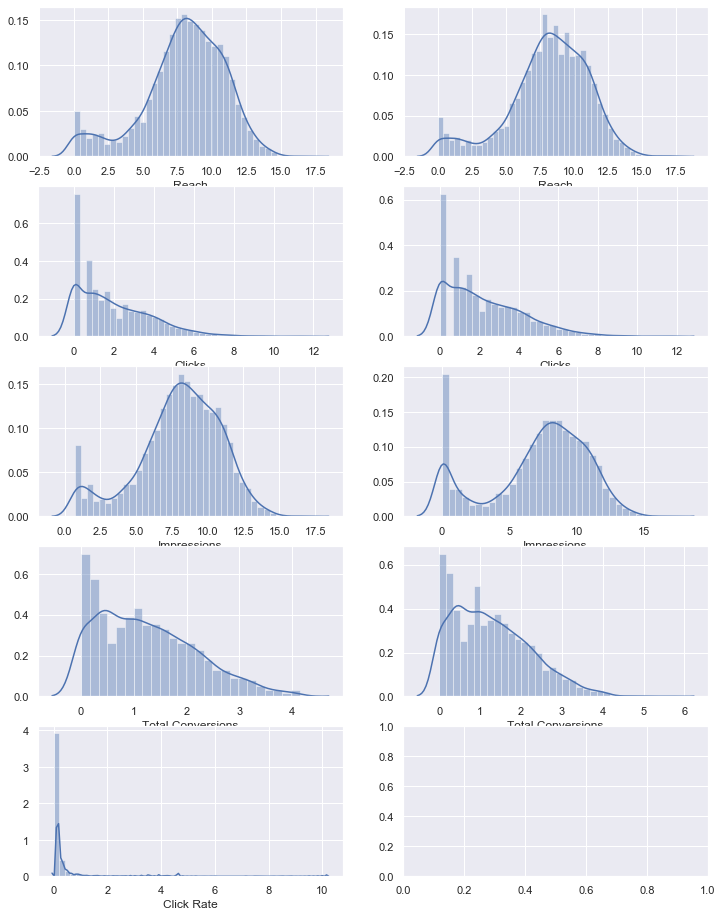

In [103]:
sns.set()
fig,ax = plt.subplots(figsize=(12,16),nrows=5,ncols=2)
ax=ax.flatten()
sns.distplot(np.log(merged_df.loc[~merged_df['is_click_rate_nan'],'Reach']),ax=ax[0])
sns.distplot(np.log(merged_df['Reach']),ax=ax[1])

sns.distplot(np.log(merged_df.loc[~merged_df['is_click_rate_nan'],'Clicks']+1),ax=ax[2])
sns.distplot(np.log(merged_df['Clicks']+1),ax=ax[3])

sns.distplot(np.log(merged_df.loc[~merged_df['is_click_rate_nan'],'Impressions']+1),ax=ax[4])
sns.distplot(np.log(merged_df['Impressions']+1),ax=ax[5])

sns.distplot(np.log10(merged_df.loc[~merged_df['is_click_rate_nan'],'Total Conversions']+1),ax=ax[6])
sns.distplot(np.log10(merged_df['Total Conversions']+1),ax=ax[7])

sns.distplot(np.log(merged_df.loc[~merged_df['is_click_rate_nan'],'Click Rate']+1),ax=ax[8])

In [62]:
merged_df.loc[merged_df['is_click_rate_nan'],'Placement Pixel Size Bin'].value_counts()

Tracking    516
MPUs          5
Name: Placement Pixel Size Bin, dtype: int64

Most of the Click rate Nan values are of ads of the Tracking type. We split the data between nan and no nan in Click Rate.

In [66]:
merged_df_nonan = merged_df.dropna()
merged_df_nonan['log_Total_Conversions'] = np.log(merged_df_nonan['Total Conversions']+1)
merged_df_nonan['log_Clicks'] = np.log(merged_df_nonan['Clicks']+1)
merged_df_nonan['log_Impressions'] = np.log(merged_df_nonan['Impressions'])
merged_df_nonan['log_Click_Rate'] = np.log(merged_df_nonan['Click Rate']+1)

/Users/smarchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/smarchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/smarchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

### boxplots

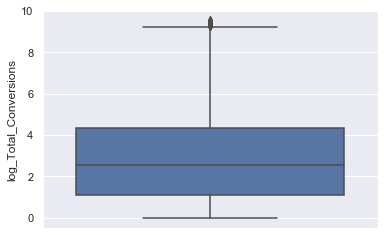

In [69]:
                          
sns.boxplot(y='log_Total_Conversions', data=merged_df_nonan)

In [86]:
def plot_boxplots(df,variable):
    fig,ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
    ax=ax.flatten()
    _ = sns.boxplot(x='Platform Type', y=variable, data=df, ax=ax[0])
    _ = sns.boxplot(x='Site Bin', y=variable, data=df, ax=ax[1])
    _ = sns.boxplot(x='Placement Pixel Size Bin', y=variable, data=df, ax=ax[2])
    ax[0].tick_params(axis='x',rotation=90)
    ax[1].tick_params(axis='x',rotation=90)
    ax[2].tick_params(axis='x',rotation=90)
    plt.show()

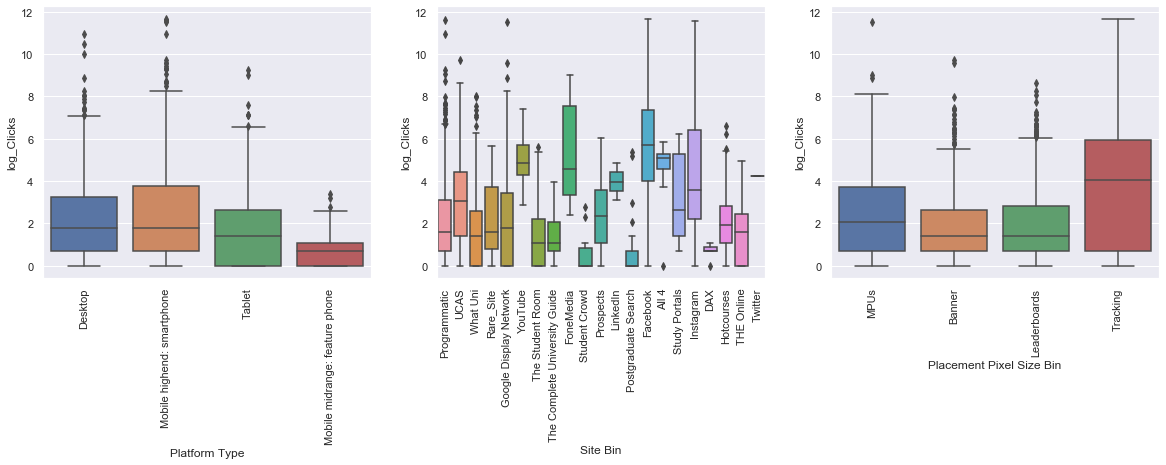

In [87]:
sns.set()
plot_boxplots(merged_df_nonan, 'log_Clicks')

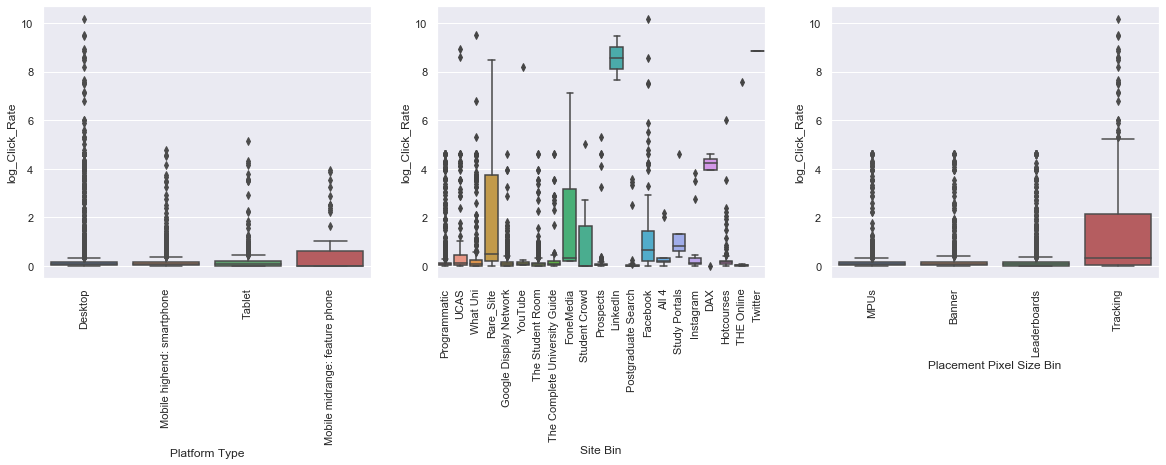

In [88]:
plot_boxplots(merged_df_nonan, 'log_Click_Rate')

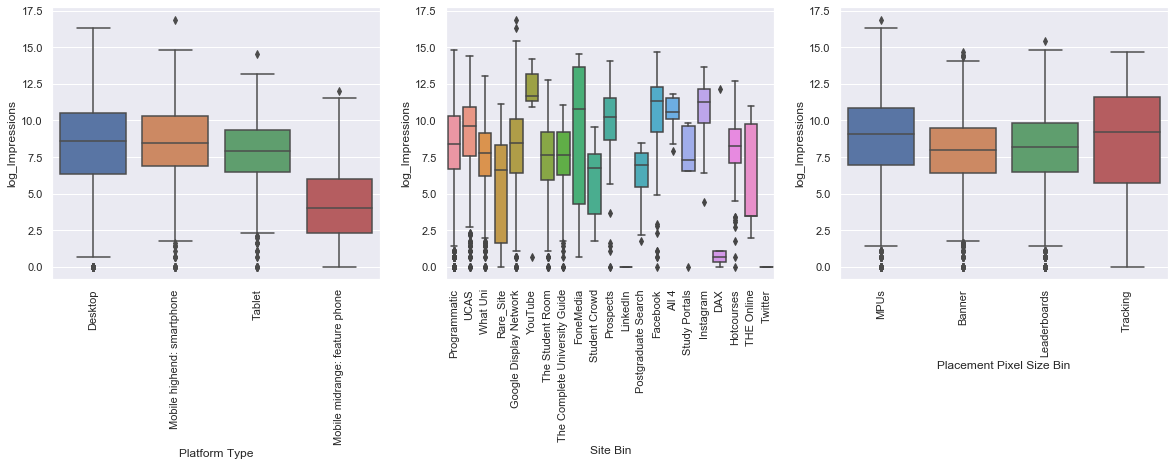

In [89]:
plot_boxplots(merged_df_nonan,'log_Impressions')

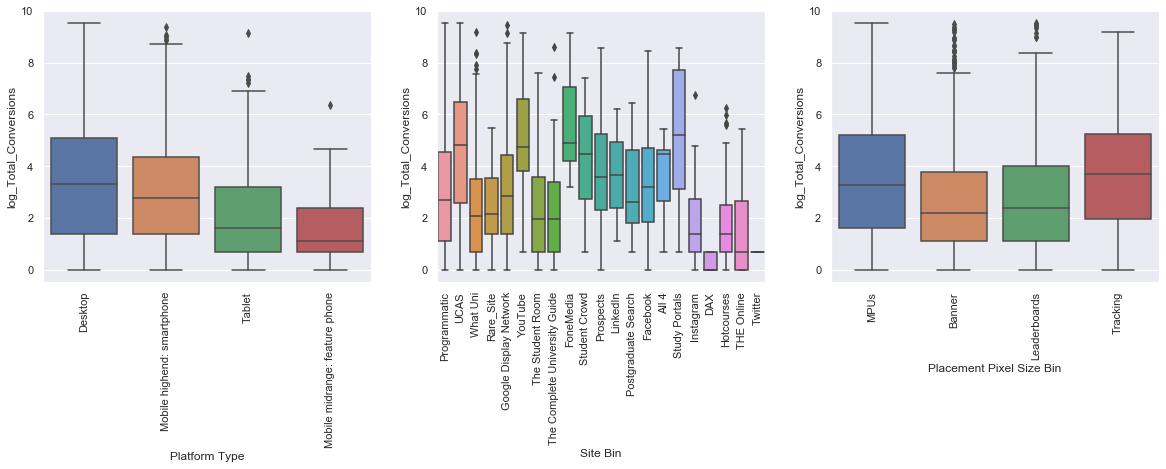

In [90]:
plot_boxplots(merged_df_nonan, 'log_Total_Conversions')

### Pairplot

In [91]:
numeric_cols = ['log_Clicks',
                'log_Click_Rate',
                'log_Impressions',
                'log_Total_Conversions']

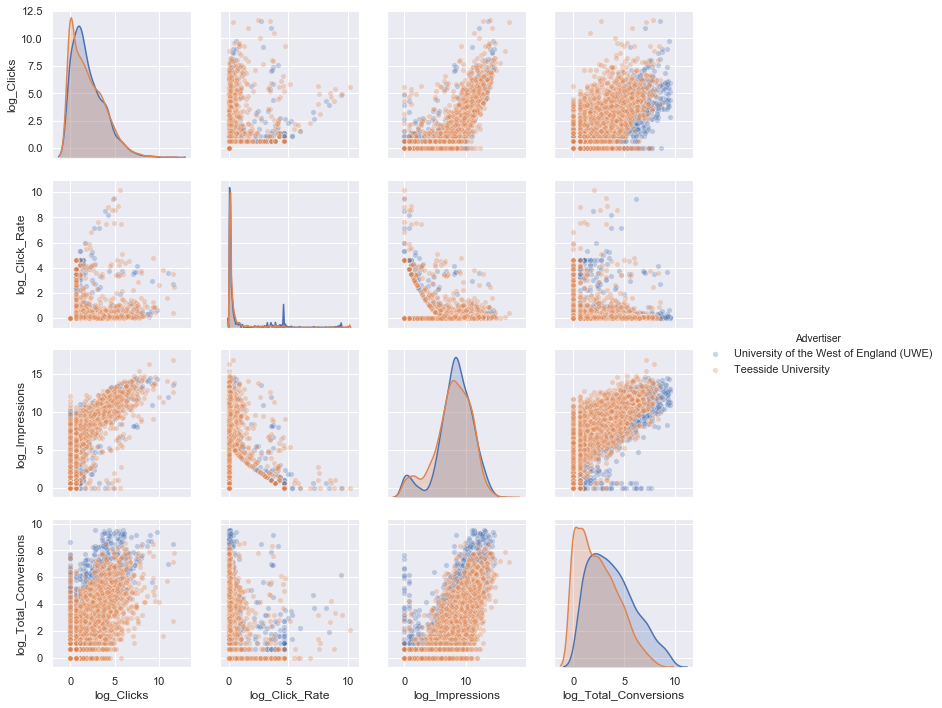

In [99]:
sns.set()
_ = sns.pairplot(merged_df_nonan,hue='Advertiser',vars=numeric_cols, plot_kws=dict(alpha=0.3, s=30))

### Correlation matrix

In [96]:
corr=merged_df_nonan[['log_Clicks','log_Click_Rate','log_Impressions',
                    'log_Total_Conversions']].corr()

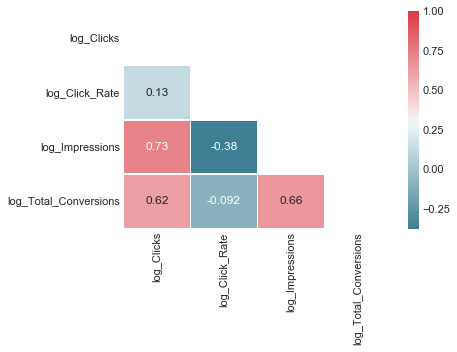

In [97]:
plt.style.use('seaborn-white')

cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap = cmap, mask=mask, linewidths=.5, annot=True)